In [1]:
import glob 
import numpy as np 
import pandas as pd 
import json
from keras.applications import vgg16 
from keras.applications import inception_v3 
from keras.applications import resnet50 
from keras.applications import mobilenet 
from keras.layers import Input,Flatten,Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

# 統一輸入影像為224x224x3
new_input = Input(shape=(224, 224, 3))
# 統一輸出層特徵向量1024維
num_classes = 1024

#Load the VGG16 model
base_model = vgg16.VGG16(weights='imagenet', input_tensor=new_input, include_top=False )
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
predictions = Dense(num_classes, activation = 'softmax')(x)
#create graph of your new model
vgg_model = Model(input = base_model.input, output = predictions)
#compile the model
vgg_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



#Load the Inception_V3 model 
base_model = inception_v3.InceptionV3(weights='imagenet', input_tensor=new_input, include_top=False)
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
predictions = Dense(num_classes, activation = 'softmax')(x)
#create graph of your new model
inception_model = Model(input = base_model.input, output = predictions)
#compile the model
inception_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



#Load the ResNet50 model 
base_model = resnet50.ResNet50(weights='imagenet', input_tensor=new_input, include_top=False)
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
predictions = Dense(num_classes, activation = 'softmax')(x)
#create graph of your new model
resnet_model = Model(input = base_model.input, output = predictions)
#compile the model
resnet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



#Load the MobileNet model 
base_model = mobilenet.MobileNet(weights='imagenet', input_tensor=new_input, include_top=False)
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
predictions = Dense(num_classes, activation = 'softmax')(x)
#create graph of your new model
mobilenet_model = Model(input = base_model.input, output = predictions)
#compile the model
mobilenet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



Using TensorFlow backend.
W0920 07:52:59.843230  5644 deprecation_wrapper.py:119] From C:\Users\upen24931251\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0920 07:52:59.855168  5644 deprecation_wrapper.py:119] From C:\Users\upen24931251\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0920 07:52:59.857163  5644 deprecation_wrapper.py:119] From C:\Users\upen24931251\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0920 07:52:59.881126  5644 deprecation_wrapper.py:119] From C:\Users\upen24931251\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0920 07:53:00.133455  56

In [53]:
# 調整JSON的 float 列印於文件中的格式
class MyCustomEncoder( json.JSONEncoder ):
    def iterencode( self, obj ):
        if isinstance( obj, float ):
            yield format( obj, '.6f' )
        elif isinstance( obj, dict ):
            last_index = len( obj ) - 1
            yield '{'
            i = 0
            for key, value in obj.items():
                yield '"' + key + '": '
                for chunk in MyCustomEncoder.iterencode( self, value ):
                    yield chunk
                if i != last_index:
                    yield ", "
                i += 1
            yield '}'
        elif isinstance( obj, list ):
            last_index = len( obj ) - 1
            yield "["
            for i, o in enumerate( obj ):
                for chunk in MyCustomEncoder.iterencode( self, o ):
                    yield chunk
                if i != last_index:
                    yield ", "
            yield "]"
        else:
            for chunk in json.JSONEncoder.iterencode( self, obj ):
                yield chunk
                
def VGG_GetTrainFeatures( train_path, outputName ):

    fileName = "VGG_" + outputName
    outfile = open( fileName, 'w' )
    outfile.close()
    outfile = open(fileName, 'a')
    outfile.write(R'{"Features": [')

    trainImgTotal = glob.glob( train_path )
    
    for index, name in enumerate(trainImgTotal):
        img = image.load_img(name, target_size=(224, 224))
        img_data = image.img_to_array( img )
        img_data = np.expand_dims( img_data, axis=0 )
        img_data = vgg16.preprocess_input( img_data )
        
        feature = vgg_model.predict( img_data )
        feature_np = np.array( feature )
        feature_flatten = feature_np.tolist()
        data_single = {"feature":feature_flatten}
        
        if index < (trainImgTotal.__len__()-1):
            tmpStr = json.dumps( data_single ) + ","
        else:
            tmpStr = json.dumps( data_single ) + "]}"
        outfile.write( tmpStr )
    
    outfile.close()
        
def INCEPTION_GetTrainFeatures( train_path, outputName ):
    fileName = "INCEPTION_" + outputName
    outfile = open( fileName, 'w' )
    outfile.close()
    outfile = open(fileName, 'a')
    outfile.write(R'{"Features": [')
    
    trainImgTotal = glob.glob( train_path )
    for index, name in enumerate(trainImgTotal):
        img = image.load_img(name, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = inception_v3.preprocess_input(img_data)
        
        feature = inception_model.predict( img_data )
        feature_np = np.array( feature )
        feature_flatten = feature_np.tolist()
        data_single = {"feature":feature_flatten}
        
        if index < (trainImgTotal.__len__()-1):
            tmpStr = json.dumps( data_single ) + ","
        else:
            tmpStr = json.dumps( data_single ) + "]}"
        outfile.write( tmpStr )
    
    outfile.close()

        
def RESNET_GetTrainFeatures( train_path, outputName ):

    fileName = "RESNET_" + outputName
    outfile = open( fileName, 'w' )
    outfile.close()
    outfile = open(fileName, 'a')
    outfile.write(R'{"Features": [')

    trainImgTotal = glob.glob( train_path )
    for index, name in enumerate(trainImgTotal):
        img = image.load_img(name, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = vgg16.preprocess_input(img_data)
        
        feature = resnet_model.predict( img_data )
        feature_np = np.array( feature )
        feature_flatten = feature_np.tolist()
        data_single = {"feature":feature_flatten}
        
        if index < (trainImgTotal.__len__()-1):
            tmpStr = json.dumps( data_single ) + ","
        else:
            tmpStr = json.dumps( data_single ) + "]}"
        outfile.write( tmpStr )
    
    outfile.close()


def MOBILENET_GetTrainFeatures( train_path, outputName ):

    fileName = "MOBILENET_" + outputName
    outfile = open( fileName, 'w' )
    outfile.close()
    outfile = open(fileName, 'a')
    outfile.write(R'{"Features": [')

    trainImgTotal = glob.glob( train_path )
    for index, name in enumerate(trainImgTotal):
        img = image.load_img( name, target_size=(224, 224) )
        img_data = image.img_to_array( img )
        img_data = np.expand_dims( img_data, axis=0 )
        img_data = vgg16.preprocess_input(img_data)
        
        feature = mobilenet_model.predict( img_data )
        feature_np = np.array( feature )
        feature_flatten = feature_np.tolist()
        data_single = {"feature":feature_flatten}
        
        if index < (trainImgTotal.__len__()-1):
            tmpStr = json.dumps( data_single ) + ","
        else:
            tmpStr = json.dumps( data_single ) + "]}"
        outfile.write( tmpStr )
    
    outfile.close()

In [54]:
# P_Evaluation 訓練用影像集合
# P_T_Evaluation 驗證用影像集合
# N_Evaluation other影像集合
VGG_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\N_Evaluation\*\*.tiff","N_Evaluation.json")
VGG_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_Evaluation\*\*.tiff","P_Evaluation.json")
VGG_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_T_Evaluation\*\*.tiff","P_T_Evaluation.json")

INCEPTION_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\N_Evaluation\*\*.tiff","N_Evaluation.json")
INCEPTION_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_Evaluation\*\*.tiff","P_Evaluation.json")
INCEPTION_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_T_Evaluation\*\*.tiff","P_T_Evaluation.json")


RESNET_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\N_Evaluation\*\*.tiff","N_Evaluation.json")
RESNET_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_Evaluation\*\*.tiff","P_Evaluation.json")
RESNET_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_T_Evaluation\*\*.tiff","P_T_Evaluation.json")

MOBILENET_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\N_Evaluation\*\*.tiff","N_Evaluation.json")
MOBILENET_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_Evaluation\*\*.tiff","P_Evaluation.json")
MOBILENET_GetTrainFeatures(r"C:\Users\upen24931251\Projects\board_classification\P_T_Evaluation\*\*.tiff","P_T_Evaluation.json")

In [80]:
# VGG
# P_Evaluation 訓練用影像集合
# P_T_Evaluation 驗證用影像集合
# N_Evaluation other影像集合
from scipy.spatial import distance

strFeaturePath = r"VGG_N_Evaluation.json"
VGG_N = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        VGG_N.append( f[ "feature" ][0] )
            
strFeaturePath = r"VGG_P_Evaluation.json"
VGG_P = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        VGG_P.append( f[ "feature" ][0] )
            
strFeaturePath = r"VGG_P_T_Evaluation.json"
VGG_PT = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        VGG_PT.append( f[ "feature" ][0] )
        
train_dist_VGG = distance.cdist(VGG_P, VGG_P, 'euclidean')
train_dist_VGG_noD = train_dist_VGG[~np.eye(train_dist_VGG.shape[0],dtype=bool)].reshape(train_dist_VGG.shape[0],-1)
tdVnoD = np.amin(train_dist_VGG_noD, axis=1)

train_test_dist_VGG = distance.cdist(VGG_P, VGG_PT, 'euclidean')
ttdV = np.amin(train_test_dist_VGG, axis=1)

train_other_dist_VGG = distance.cdist(VGG_P, VGG_N, 'euclidean')
todV = np.amin(train_other_dist_VGG, axis=1)

In [82]:
tdVnoD.shape

(1546,)

In [97]:
# RESNET
# P_Evaluation 訓練用影像集合
# P_T_Evaluation 驗證用影像集合
# N_Evaluation other影像集合

strFeaturePath = r"RESNET_N_Evaluation.json"
RESNET_N = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        RESNET_N.append( f[ "feature" ][0] )
            
strFeaturePath = r"RESNET_P_Evaluation.json"
RESNET_P = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        RESNET_P.append( f[ "feature" ][0] )
            
strFeaturePath = r"RESNET_P_T_Evaluation.json"
RESNET_PT = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        RESNET_PT.append( f[ "feature" ][0] )
        
train_dist_RESNET = distance.cdist(RESNET_P, RESNET_P, 'euclidean')
train_dist_RESNET_noD = train_dist_RESNET[~np.eye(train_dist_RESNET.shape[0],dtype=bool)].reshape(train_dist_RESNET.shape[0],-1)
tdRnoD = np.amin(train_dist_RESNET_noD, axis=1)

train_test_dist_RESNET = distance.cdist(RESNET_P, RESNET_PT, 'euclidean')
ttdR = np.amin(train_test_dist_RESNET, axis=1)

train_other_dist_RESNET = distance.cdist(RESNET_P, RESNET_N, 'euclidean')
todR = np.amin(train_other_dist_RESNET, axis=1)


In [85]:
# INCEPTION
# P_Evaluation 訓練用影像集合
# P_T_Evaluation 驗證用影像集合
# N_Evaluation other影像集合

strFeaturePath = r"INCEPTION_N_Evaluation.json"
INCEPTION_N = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        INCEPTION_N.append( f[ "feature" ][0] )
            
strFeaturePath = r"INCEPTION_P_Evaluation.json"
INCEPTION_P = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        INCEPTION_P.append( f[ "feature" ][0] )
            
strFeaturePath = r"INCEPTION_P_T_Evaluation.json"
INCEPTION_PT = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        INCEPTION_PT.append( f[ "feature" ][0] )
        
train_dist_INCEPTION = distance.cdist(INCEPTION_P, INCEPTION_P, 'euclidean')
train_dist_INCEPTION_noD = train_dist_INCEPTION[~np.eye(train_dist_INCEPTION.shape[0],dtype=bool)].reshape(train_dist_INCEPTION.shape[0],-1)
tdInoD = np.amin(train_dist_INCEPTION_noD, axis=1)

train_test_dist_INCEPTION = distance.cdist(INCEPTION_P, INCEPTION_PT, 'euclidean')
ttdI = np.amin(train_test_dist_INCEPTION, axis=1)

train_other_dist_INCEPTION = distance.cdist(INCEPTION_P, INCEPTION_N, 'euclidean')
todI = np.amin(train_other_dist_INCEPTION, axis=1)

In [86]:
# MOBILENET
# P_Evaluation 訓練用影像集合
# P_T_Evaluation 驗證用影像集合
# N_Evaluation other影像集合

strFeaturePath = r"MOBILENET_N_Evaluation.json"
MOBILENET_N = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        MOBILENET_N.append( f[ "feature" ][0] )
            
strFeaturePath = r"MOBILENET_P_Evaluation.json"
MOBILENET_P = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        MOBILENET_P.append( f[ "feature" ][0] )
            
strFeaturePath = r"MOBILENET_P_T_Evaluation.json"
MOBILENET_PT = [ ]
with open( strFeaturePath, 'r' ) as json_file:
    data = json.load( json_file )
    features = data[ "Features" ]
    for f in features:
        # print(f['Features'])
        MOBILENET_PT.append( f[ "feature" ][0] )
        
train_dist_MOBILENET = distance.cdist(MOBILENET_P, MOBILENET_P, 'euclidean')
train_dist_MOBILENET_noD = train_dist_MOBILENET[~np.eye(train_dist_MOBILENET.shape[0],dtype=bool)].reshape(train_dist_MOBILENET.shape[0],-1)
tdMnoD = np.amin(train_dist_MOBILENET_noD, axis=1)

train_test_dist_MOBILENET = distance.cdist(MOBILENET_P, MOBILENET_PT, 'euclidean')
ttdM = np.amin(train_test_dist_MOBILENET, axis=1)

train_other_dist_MOBILENET = distance.cdist(MOBILENET_P, MOBILENET_N, 'euclidean')
todM = np.amin(train_other_dist_MOBILENET, axis=1)

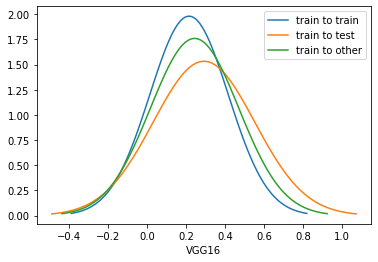

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(tdVnoD)
sigma = np.std(tdVnoD)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to train')

mu = np.mean(ttdV)
sigma = np.std(ttdV)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to test')

mu = np.mean(todV)
sigma = np.std(todV)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to other')
plt.legend()
plt.xlabel("VGG16")
plt.show()


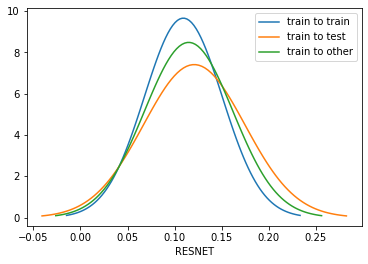

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(tdRnoD)
sigma = np.std(tdRnoD)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to train')

mu = np.mean(ttdR)
sigma = np.std(ttdR)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to test')

mu = np.mean(todR)
sigma = np.std(todR)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to other')
plt.legend()
plt.xlabel("RESNET")
plt.show()

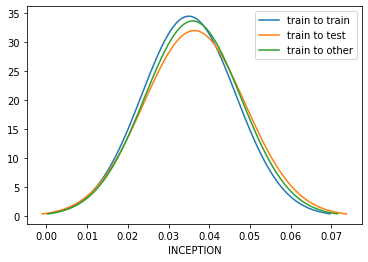

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(tdInoD)
sigma = np.std(tdInoD)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to train')

mu = np.mean(ttdI)
sigma = np.std(ttdI)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to test')

mu = np.mean(todI)
sigma = np.std(todI)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to other')
plt.legend()
plt.xlabel("INCEPTION")
plt.show()

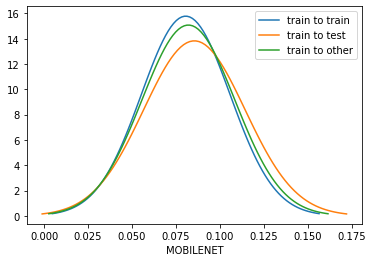

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(tdMnoD)
sigma = np.std(tdMnoD)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to train')

mu = np.mean(ttdM)
sigma = np.std(ttdM)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to test')

mu = np.mean(todM)
sigma = np.std(todM)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='train to other')
plt.legend()
plt.xlabel("MOBILENET")
plt.show()